In [1]:
from simulator.utils import *
import numpy as np

In [2]:
"""
Sanity check:
"""
sim = simulator(100, 1)
print(sim)

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1


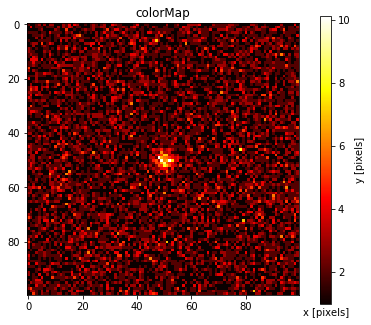

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 1
photons per atom: 100
photons_in_background: 1
x0: 50
y0: 50


array([[2., 1., 1., ..., 1., 4., 1.],
       [1., 4., 1., ..., 2., 1., 3.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [3., 5., 2., ..., 3., 3., 2.],
       [1., 3., 3., ..., 2., 2., 1.],
       [1., 1., 5., ..., 4., 2., 1.]])

In [3]:
"""
Create single atom at the center
"""
x0 = sim.img_size // 2
photons_from_atom = 100
photons_in_background = 1
sim.create_simulation(x0, x0, photons_from_atom, photons_in_background, verbose=True)


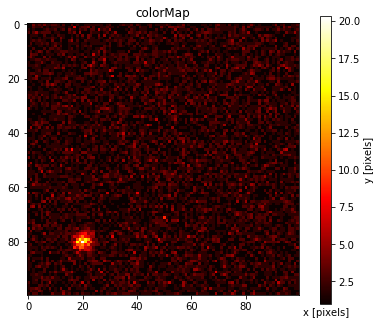

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 1
photons per atom: 200
photons_in_background: 1
x0: 20
y0: 80


array([[1., 1., 4., ..., 2., 2., 3.],
       [1., 1., 3., ..., 2., 2., 2.],
       [2., 1., 2., ..., 1., 2., 3.],
       ...,
       [2., 3., 3., ..., 1., 2., 2.],
       [1., 3., 2., ..., 1., 1., 1.],
       [2., 1., 3., ..., 1., 1., 2.]])

In [4]:
"""
create an atom in the lower left corner
"""
photons_from_atom = 200
photons_in_background = 1
sim.create_simulation(20, 80, photons_from_atom, photons_in_background, verbose=True)

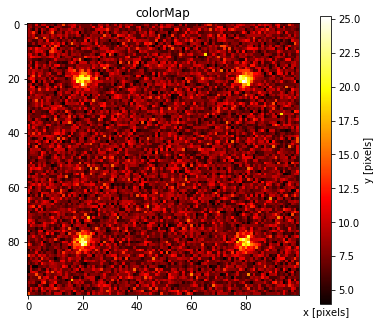

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 4
photons per atom: 200
photons_in_background: 1
x0: [20 20 80 80]
y0: [80 20 80 20]


array([[ 8.,  8.,  6., ...,  9.,  7.,  7.],
       [ 8.,  9.,  6., ...,  8.,  8.,  7.],
       [ 9.,  7.,  5., ...,  8.,  7.,  6.],
       ...,
       [ 6., 11.,  8., ..., 11., 10.,  6.],
       [ 7., 10.,  6., ..., 10.,  6.,  7.],
       [14.,  8.,  8., ...,  7.,  8.,  7.]])

In [5]:
"""
create 4 atoms at each corner
"""
photons_from_atom = 200
photons_in_background = 1
x0 = np.array([20, 20, 80, 80])
y0 = np.array([80, 20, 80, 20])
sim.create_simulation(x0, y0, photons_from_atom, photons_in_background, verbose=True)

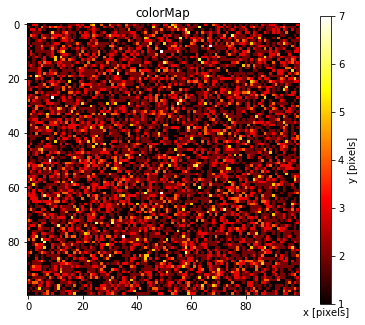

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 0
photons per atom: 200
photons_in_background: 1
x0: 3
y0: 4


array([[1, 1, 3, ..., 1, 1, 3],
       [2, 1, 1, ..., 2, 2, 1],
       [1, 3, 3, ..., 3, 1, 2],
       ...,
       [1, 2, 1, ..., 2, 4, 2],
       [2, 1, 2, ..., 1, 2, 1],
       [1, 1, 1, ..., 1, 3, 2]])

In [6]:
"""
create no atoms, just the noise
"""
photons_from_atom = 200
photons_in_background = 1
sim.create_simulation(3, 4, photons_from_atom, photons_in_background, no_atom=True, verbose=True)

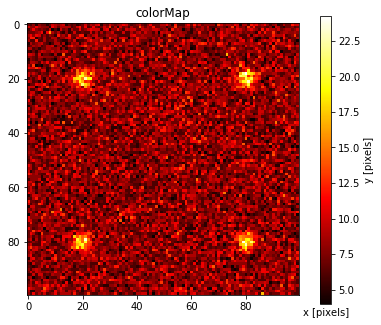

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 4
photons_in_background is set to 1 by default
SNR: 200
x0: [20 20 80 80]
y0: [80 20 80 20]


array([[ 7.,  6.,  8., ..., 12., 10., 10.],
       [10.,  8.,  8., ...,  8.,  6.,  7.],
       [ 6.,  8., 11., ...,  7.,  8., 10.],
       ...,
       [11., 10.,  9., ..., 11.,  8.,  6.],
       [ 9.,  5.,  5., ...,  7.,  8.,  6.],
       [ 8.,  6., 11., ...,  7.,  6.,  6.]])

In [8]:
"""
create from SNR:
"""

sim.create_simulation_from_SNR(x0, y0, 200, verbose=True)

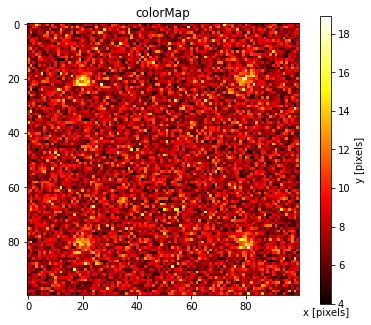

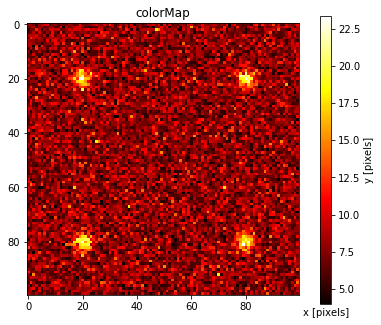

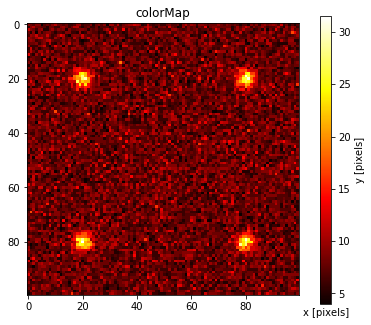

In [10]:
"""
create data list from SNR 
"""
SNR = np.array([100, 200, 300])
data = []
for i in SNR:
    out = sim.create_simulation_from_SNR(x0, y0, i)
    data.append(out)
    visualize(out)
